<h1>Text Classification using Logistic Regression<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Logistic-Regression-Theory" data-toc-modified-id="Logistic-Regression-Theory-1">Logistic Regression Theory</a></span><ul class="toc-item"><li><span><a href="#Regression-Revision" data-toc-modified-id="Regression-Revision-1.1">Regression Revision</a></span></li><li><span><a href="#Linear-Classifiers" data-toc-modified-id="Linear-Classifiers-1.2">Linear Classifiers</a></span><ul class="toc-item"><li><span><a href="#Linear-Classifier-Example" data-toc-modified-id="Linear-Classifier-Example-1.2.1">Linear Classifier Example</a></span></li></ul></li><li><span><a href="#Logistic-Regression-Classifier" data-toc-modified-id="Logistic-Regression-Classifier-1.3">Logistic Regression Classifier</a></span><ul class="toc-item"><li><span><a href="#Sigmoid-Function" data-toc-modified-id="Sigmoid-Function-1.3.1">Sigmoid Function</a></span></li><li><span><a href="#Maximum-Likelihood-Quality-Metric" data-toc-modified-id="Maximum-Likelihood-Quality-Metric-1.3.2">Maximum Likelihood Quality Metric</a></span></li><li><span><a href="#Gradient-Ascent-(TODO:-Add-some-theory-to-this-section)" data-toc-modified-id="Gradient-Ascent-(TODO:-Add-some-theory-to-this-section)-1.3.3">Gradient Ascent (TODO: Add some theory to this section)</a></span></li></ul></li></ul></li><li><span><a href="#Machine-Learning-Project-Lifecycle:-Second-Iteration" data-toc-modified-id="Machine-Learning-Project-Lifecycle:-Second-Iteration-2">Machine Learning Project Lifecycle: Second Iteration</a></span><ul class="toc-item"><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-2.1">Problem Statement</a></span></li><li><span><a href="#Training-Data" data-toc-modified-id="Training-Data-2.2">Training Data</a></span></li><li><span><a href="#Preprocessing-+-Feature-Engineering" data-toc-modified-id="Preprocessing-+-Feature-Engineering-2.3">Preprocessing + Feature Engineering</a></span></li><li><span><a href="#Machine-Learning-Algorithm:-Logistic-Regression" data-toc-modified-id="Machine-Learning-Algorithm:-Logistic-Regression-2.4">Machine Learning Algorithm: Logistic Regression</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-2.5">Modeling</a></span></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-2.6">Model Evaluation</a></span></li><li><span><a href="#Quality-Metrics" data-toc-modified-id="Quality-Metrics-2.7">Quality Metrics</a></span></li><li><span><a href="#Model-Evaluation-on-Test-Dataset" data-toc-modified-id="Model-Evaluation-on-Test-Dataset-2.8">Model Evaluation on Test Dataset</a></span></li></ul></li><li><span><a href="#Homework" data-toc-modified-id="Homework-3">Homework</a></span></li><li><span><a href="#Resources" data-toc-modified-id="Resources-4">Resources</a></span></li></ul></div>

<img src="../images/classification.png" alt="Classification" style="width: 700px;"/>

## Logistic Regression Theory

### Regression Revision

### Linear Classifiers

- Called Linear Classifiers because output is weighted sum of input features.
- Training a classifier -> Learning the coefficients.

<img src='../images/linear_classifier_decision_boundry.jpg' alt='Linear Classifier decision boundry' style="width: 600px;" align="left">

#### Linear Classifier Example

*Linear Classifier example to classify document to check whether documents belong to Student Loan class or not*

*Training Data*

- +1 -> Belongs to Student Loan class
- -1 -> Doesnt belong to Student Loan Class

| Document | +1 or -1|
|:---------|:----------------:|
| EMI is high on Student Loan. | +1 |
| Interest is not great on Savings account.| -1 |
| Interest on Student loan has decreased.| + 1|

*Linear Classifier Model*

| Word(x) | Coefficient| Coefficient Value|
|:---------:|:----------------:| :----------------: |
|  | $ w_0 $ |1.0 |
| EMI | $ w_1 $ | 2.0 |
| Student | $ w_2 $ | 3.0 |
| Interest | $ w_3 $ | 1.0 |
| Loan | $ w_4 $ | 1.0 |
| Savings | $ w_5 $ | -2.0 |

*Classification*

$ y = sign(Score(x_i)) $

    - if sign is +1, input document belongs to Student Loan class
    - if sign is -1, input document doesn't belong to Student Loan class

$ Score(x_i) = w_0 + w_1 * x_i[1] + ... +  w_d * x_i[d] = w ^ T . X_i $

where

- $ x_i $ -> $ x_d $ are features.
- $ w_0 $ -> $ w_d $ are coefficients.

Assumes that x is 1 for all the token,

Q) Given `EMI Student`, check if this tokenised sentence belongs to `Student Loan` product category or not?

Q) Given `Interest Savings`, check if this tokenised sentence belongs to `Student Loan` product category or not?

### Logistic Regression Classifier

- Linear classifier/model which uses *Logistic/Logit Link Function* to shrink the output of $ Score(x_i) $ function to 0.0 - 1.0 probability range.

$ P(y_i | x_i, w) = Link Function \: ( \: Score \: ( \: w \: ^ t \: . h(x) \: ) \:)$

<img src='../images/logistic_classifier_to_lr_classifier.jpg' alt='Linear Classifier to LR Classifier' style="width: 550px;" align="left">

#### Sigmoid Function

- How to make predictions in term of probability?

$ sigmoid(Score) = 1 \: / \:  (1 + e ^ {-score}) $

| Score | -${\infty}$ | -2 | 0.0 | +2 | +${\infty}$ |
|:---------:|:-------:| :--: | :-------:| :-------:| :-------:|
| sigmoid(Score)|0|.12 |.5|.88| 1| 


In [114]:
import numpy as np

def sigmoid(value):
    return 1 / (1 + np.exp(-value))

In [115]:
import seaborn as sns;
sns.set()

import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style="whitegrid")

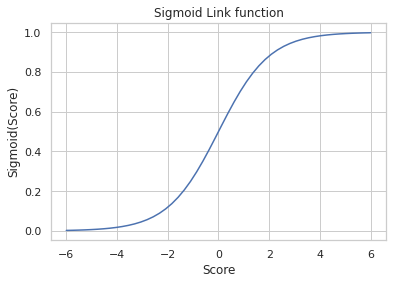

In [116]:
x = np.linspace(-6, 6)
y = sigmoid(x)

data = {'Score': x, 'Sigmoid(Score)': y}
ax = sns.lineplot(x='Score', y='Sigmoid(Score)', data=data)
ax.set(xlabel='Score', ylabel='Sigmoid(Score)')
ax.set(title='Sigmoid Link function');

#### Maximum Likelihood Quality Metric

- *How to evaluate the learned coefficients?*

    Model which returns the highest likelihood given the $ w_i ... w_d $


| Data Point | X[1] | X[2]  |  y  | Choose w to maximise                  |
|:----------:|:----:| :---: | :-: | :-----------------------------------: |
| x,y      | 2    | 1     | +1  | $ P(y = +1 | x, w) $   |
| x,y      | 0    | 2     | -1  | $ P(y = -1 | x, w) $   |
| x,y      | 6    | 7     | -1  | $ P(y = -1 | x, w) $   |
| x,y      | 19   | 1     | +1  | $ P(y = +1 | x, w) $  |

$ likelihood(w) = {\displaystyle \prod_{i=1}^N P(y_i | x_i, w)} $

<img src='../images/likelihood_example.jpg' alt='Maximum Likelihood Example' style="width: 600px;" align="left">

#### Gradient Ascent (TODO: Add some theory to this section)

- How to learn the coefficients?

*High Level Algorithm for Single data point*

- while not converged:

    - $ \displaystyle w ^ {t + 1} = w ^ {t}  + n {\displaystyle \frac{ \partial l}{\partial w}}$
    
For multiple data points, we will use d + 1 dimensional vector as

$ \displaystyle \nabla l (w) = \begin{vmatrix} {\displaystyle \frac{ \partial l}{\partial w_0}} \\ {\displaystyle \frac{ \partial l}{\partial w_1}} \\ ... \\ {\displaystyle \frac{ \partial l}{\partial w_d}} \end{vmatrix}$


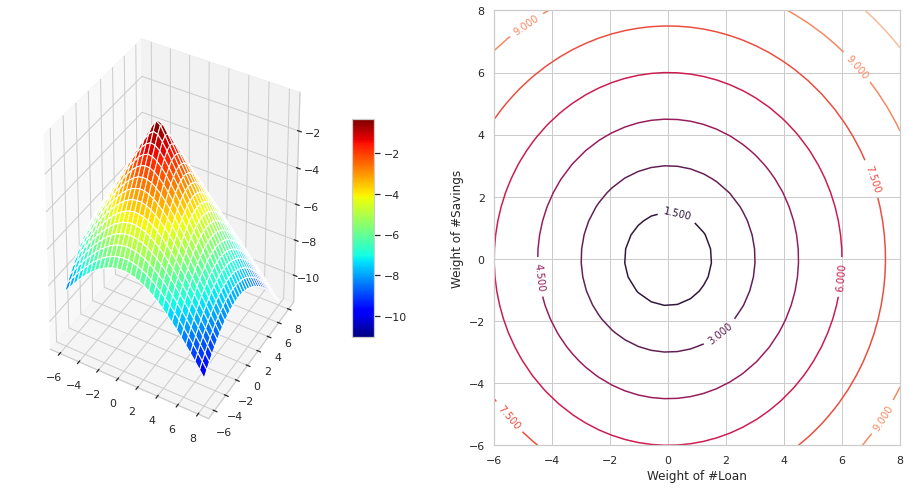

In [221]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = 8, 8

x1 = np.linspace(-6, 8, 32)
x2 = np.linspace(-6, 8, 32)

X1, X2 = np.meshgrid(x1, x2)
Y = np.sqrt(np.square(X1) + np.square(X2))

#fig = plt.figure(figsize=plt.figaspect(0.5))
fig = plt.figure(figsize=plt.figaspect(0.5))

# First Plot
ax = fig.add_subplot(1, 2, 1, projection='3d')

surf = ax.plot_surface(X1, X2, Y * -1, cmap='jet')
fig.colorbar(surf, shrink=0.5, aspect=10)

# Second Plot
ax = fig.add_subplot(1, 2, 2)

cp = plt.contour(X1, X2, Y)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('Weight of #Loan')
plt.ylabel('Weight of #Savings')
plt.show()

**Derivative of Likelihood**

$ {\displaystyle \frac{ \partial (w)}{\partial w_j}} = \displaystyle \sum_{i=1}^N h_j(x_i) (1[y_i = +1] - P(y = +1 | x_i, w))$

where

- $1[y_i = +1]$ is 1 if $y_i$ = +1 or 0 if $y_i$ = -1

*Example*

- $ w_1 $ = 1
- n = 0.1

| X[1] | X[2]  |  y  | $P(y_i)$ | Contribution to $ w_1 $ derivative |
|----| --- | ---- | :---------------------: | -------------------------- |
| 2    | 1     | +1  |         00.05         | ?   |
| 0    | 2     | -1  |          00.02       | ?   |
| 3    | 3     | -1  |      00.05        | ?   |

*Coefficients update rule during each iteration*

Let assume that  $h_j(x_i) = 1$ in $ {\displaystyle \frac{ \partial l(w)}{\partial w_j}} = \displaystyle \sum_{i=1}^N h_j(x_i) (1[y_i = +1] - P(y = +1 | x_i, w))$

- $P(y=+1|x_i, w) \approx 1$
    - if $y_i=+1$
        - $\Delta_i = 1 * (1 - 1) \approx 0$
        - Dont change anything as predection is correct
    - elif $y_i=-1$
        - $\Delta_i = 1 * (1 - 1) \approx 1$
        - decrease $w_j$ for next iteration so that $P(y=+1|x_i, w)$ also decreases
- $P(y=+1|x_i, w) \approx 0$
    - if $y_i=-1$
        - $\Delta_i = 1 * (0 - 0) \approx 0$
        - Dont change anything as predection is correct
    - elif $y_i=+1$
        - $\Delta_i = 1 * (0 - 1) \approx 1$
        - increase $w_j$ for next iteration so that $P(y=+1|x_i, w)$ also increase

## Machine Learning Project Lifecycle: Second Iteration

- tf-idf
- Logistic Regression
- GridSearchCV
- precision, recall

### Problem Statement

Classify the Financial Consumer Complaints into different Product Categories given consumer complaint text.

**Product Categories**

- Credit reporting, repair, or other
- Debt collection
- Student loan
- Money transfer, virtual currency, or money service
- Bank account or service

### Training Data

[Kaggle: Consumer Complaint Database](https://www.kaggle.com/selener/consumer-complaint-database)

In [1]:
import pandas as pd

In [2]:
complaints_training_dataset = pd.read_csv('../datasets/consumer_complaints_training_dataset.csv')

In [3]:
complaints_training_dataset.head()

,Product,Complaint_text
0,"Credit reporting, repair, or other","My name is XXXX XXXX XXXX , not XXXX X..."
1,"Credit reporting, repair, or other",I was shocked when I reviewed my credit report...
2,"Credit reporting, repair, or other",Equifax misused of credit file. Disputing acco...
3,"Credit reporting, repair, or other",I am disturbed that you continue to list the v...
4,"Credit reporting, repair, or other",I went to multiple different credit report web...


In [4]:
complaints_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product         20000 non-null  object
 1   Complaint_text  20000 non-null  object
dtypes: object(2)
memory usage: 312.6+ KB


**Q) What is the distribution of complaints for each product type?**

In [5]:
complaints_training_dataset.Product.unique()

array(['Credit reporting, repair, or other', 'Debt collection',
       'Student loan',
       'Money transfer, virtual currency, or money service',
       'Bank account or service'], dtype=object)

In [6]:
complaints_training_dataset\
    .groupby('Product')\
    [['Complaint_text']]\
    .count()\
    .rename(columns={'Complaint_text': 'Count'})\
    .sort_values('Count', ascending=False)

,Count
Product,
Bank account or service,4000
"Credit reporting, repair, or other",4000
Debt collection,4000
"Money transfer, virtual currency, or money service",4000
Student loan,4000


**Q) Find out the Occurances of Duplicate Text messages if any?**

In [7]:
complaints_training_dataset['Complaint_text'].nunique()

19913

In [8]:
duplicate_complaints = complaints_training_dataset['Complaint_text']\
    .value_counts()\
    [complaints_training_dataset['Complaint_text'].value_counts() > 2].index

In [9]:
len(duplicate_complaints)

9

### Preprocessing + Feature Engineering

- tf-idf

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

RANDOM_STATE = 19

In [11]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    complaints_training_dataset['Complaint_text'],
    complaints_training_dataset['Product'],
    test_size=.2,
    stratify=complaints_training_dataset['Product'],
    random_state=RANDOM_STATE)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16000,), (4000,), (16000,), (4000,))

In [14]:
X_train_tfidf_vectorizer = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf_vectorizer = tfidf_vectorizer.transform(X_test)

In [15]:
len(tfidf_vectorizer.get_feature_names())

24253

In [16]:
tfidf_vectorizer.get_feature_names()[:10]

['00', '000', '0001', '001', '0010', '00109', '004', '00i', '01', '014']

In [17]:
tfidf_vectorizer.vocabulary_

{'xxxx': 23870,
 'account': 1264,
 'listed': 12934,
 'credit': 5847,
 'report': 18089,
 'experian': 8616,
 'paid': 15420,
 'closed': 4699,
 '2007': 316,
 'like': 12884,
 'removed': 17959,
 'years': 24179,
 'employer': 7949,
 'submitted': 20596,
 'incorrect': 11389,
 'information': 11571,
 'hsa': 10867,
 'bank': 2995,
 'subsidiary': 20629,
 'webster': 23415,
 'money': 14021,
 'deducted': 6314,
 'paycheck': 15611,
 '15': 141,
 'days': 6155,
 'hired': 10690,
 'refusing': 17693,
 'release': 17849,
 'funds': 9757,
 'corrected': 5640,
 'requested': 18186,
 'verifying': 23042,
 'identity': 11020,
 'social': 19889,
 'security': 19170,
 'number': 14713,
 'began': 3183,
 'disputing': 7212,
 'items': 12217,
 'bureaus': 3841,
 'xx': 23868,
 'sent': 19261,
 'follow': 9343,
 'letters': 12801,
 'believe': 3227,
 'public': 16890,
 'records': 17518,
 'reporting': 18098,
 'accurately': 1326,
 'compliance': 5057,
 'fcra': 8951,
 'fdcpa': 8960,
 'received': 17384,
 'didnt': 6848,
 'say': 18958,
 'company'

In [18]:
X_train_tfidf_vectorizer.shape, X_test_tfidf_vectorizer.shape

((16000, 24253), (4000, 24253))

In [19]:
X_train_array = X_train_tfidf_vectorizer.toarray()

In [20]:
X_train_array.shape

(16000, 24253)

In [21]:
def raw_text_to_vocab(text_index):
    print(X_train.iloc[text_index])
    for index, exists in enumerate(X_train_array[text_index]):
        if exists:
            print(index, '->', tfidf_vectorizer.get_feature_names()[index], exists)

In [22]:
raw_text_to_vocab(0)

XXXX account listed on my credit report with Experian and XXXX has been paid and closed since XXXX 2007. I would like this account removed from my credit report as it has been over 7 years.
316 -> 2007 0.5053025674114882
1264 -> account 0.23714799081376592
4699 -> closed 0.24369816873494327
5847 -> credit 0.2711659299396489
8616 -> experian 0.3251534568496874
12884 -> like 0.21548411669064685
12934 -> listed 0.2878745483554451
15420 -> paid 0.20196458765216904
17959 -> removed 0.24191434462896622
18089 -> report 0.3388974107843852
23870 -> xxxx 0.252468558431063
24179 -> years 0.20634045493324743


In [54]:
from sklearn.feature_selection import chi2
import numpy as np

N = 10
for product in complaints_training_dataset['Product'].unique():
  features_chi2 = chi2(X_train_tfidf_vectorizer, y_train == product)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf_vectorizer.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("\n==> %s:" %(product))
  print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))


==> Credit reporting, repair, or other:
  * Most Correlated Unigrams are: remove, bureaus, inquiry, inquiries, reporting, transunion, experian, credit, report, equifax

==> Debt collection:
  * Most Correlated Unigrams are: collections, calling, company, collector, recovery, owe, validation, collect, collection, debt

==> Student loan:
  * Most Correlated Unigrams are: plan, payment, forbearance, school, repayment, payments, student, loan, loans, navient

==> Money transfer, virtual currency, or money service:
  * Most Correlated Unigrams are: moneygram, funds, support, transaction, western, wire, money, transfer, paypal, coinbase

==> Bank account or service:
  * Most Correlated Unigrams are: atm, america, fees, deposit, bonus, branch, check, checking, overdraft, bank


### Machine Learning Algorithm: Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
lr = LogisticRegression(penalty='none', max_iter=5000, random_state=RANDOM_STATE)

### Modeling

In [25]:
%%timeit

lr.fit(X_train_tfidf_vectorizer, y_train)

26.5 s ± 206 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [39]:
lr.classes_

array(['Bank account or service', 'Credit reporting, repair, or other',
       'Debt collection',
       'Money transfer, virtual currency, or money service',
       'Student loan'], dtype=object)

In [40]:
lr.coef_

array([[  4.45527964,  11.71320653,  -0.57958248, ...,  -0.36313706,
         -0.55065392,  -0.66473836],
       [-53.75923819,  13.67907964,  -1.01580707, ...,  10.51522669,
         -0.47902942,  -0.78670433],
       [ 19.22036409,  21.97705394,  -6.01933863, ...,  -9.72853609,
          2.08523391, -58.43707307],
       [ 10.17163661,   5.96736674,  -0.807175  , ...,  -0.28395916,
         -0.60524174,  -0.3710432 ],
       [ 19.91195785, -53.33670686,   8.42190318, ...,  -0.13959437,
         -0.45030883,  60.25955896]])

In [57]:
def print_top10(vectorizer, clf, class_labels):
    """Prints features with the highest coefficient values, per class"""
    feature_names = vectorizer.get_feature_names()
    for i, class_label in enumerate(class_labels):
        top10 = np.argsort(clf.coef_[i])[-10:]
        print("\n==> %s:" %(class_label))
        print("    * %s" % (", ".join(feature_names[j] for j in top10)))

In [58]:
print_top10(tfidf_vectorizer, lr, y_train.unique())


==> Credit reporting, repair, or other:
    * paypal, cd, declined, description, bonus, banking, branch, pnc, bank, scottrade

==> Bank account or service:
    * oh, 59, results, report, investigation, breach, inquires, transunion, freeze, experian

==> Debt collection:
    * threatened, medical, reffrence, friends, collection, afni, erc, continued, paided, calling

==> Money transfer, virtual currency, or money service:
    * app, 2018, money, transaction, google, transfer, western, paypal, moneygram, coinbase

==> Student loan:
    * aes, consolidated, deferment, signer, equifax, loans, ita, repayment, fedloan, navient


### Model Evaluation

- Cross Validation
- Hyper Parameter Tunning

In [26]:
from sklearn.model_selection import cross_val_score, GridSearchCV

In [27]:
cv_scores = cross_val_score(lr, X_train_tfidf_vectorizer, y_train, cv=5)

In [29]:
print(cv_scores.mean())
print(cv_scores)

0.8265
[0.8284375 0.8378125 0.82      0.82375   0.8225   ]


In [30]:
params_grid = {
    'max_iter': [100, 1000, 2500, 5000, 7500, 10000]
}

grid_search = GridSearchCV(LogisticRegression(penalty='none',
                                              random_state=RANDOM_STATE),
                           params_grid, cv=5,
                           n_jobs=-1, verbose=1)

grid_search.fit(X_train_tfidf_vectorizer, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.5min finished
/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:937: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='none',
                                          random_state=19, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_iter': [100, 1000, 2500, 5000, 7500, 10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [31]:
print(grid_search.best_score_)
print(grid_search.best_estimator_)
print(grid_search.cv_results_)

0.8286250000000001
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=19, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
{'mean_fit_time': array([ 3.79685416, 10.7339808 , 11.00318294, 12.06940999, 10.50979061,
       10.3441277 ]), 'std_fit_time': array([0.12411618, 3.84133155, 3.15231605, 5.01800921, 3.56282789,
       3.44055938]), 'mean_score_time': array([0.00517759, 0.00495033, 0.00541468, 0.00508108, 0.00487676,
       0.00526452]), 'std_score_time': array([0.00050965, 0.00010706, 0.0005899 , 0.00020441, 0.00012834,
       0.00060805]), 'param_max_iter': masked_array(data=[100, 1000, 2500, 5000, 7500, 10000],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'max_iter': 100}, {'max_iter

### Quality Metrics

In [32]:
from sklearn.metrics import (accuracy_score,
                             confusion_matrix,
                             precision_score,
                             recall_score)

import seaborn as sns;
sns.set()

import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
predictions = lr.predict(X_test_tfidf_vectorizer)

In [34]:
accuracy_score(y_test, predictions)

0.82425

In [35]:
conf_matrix = confusion_matrix(y_test, predictions, labels=y_test.unique())
conf_matrix

array([[660,  32,  10,  80,  18],
       [ 32, 634,  24,   5, 105],
       [ 12,  38, 703,  10,  37],
       [ 94,  21,   1, 676,   8],
       [ 20, 120,  25,  11, 624]])

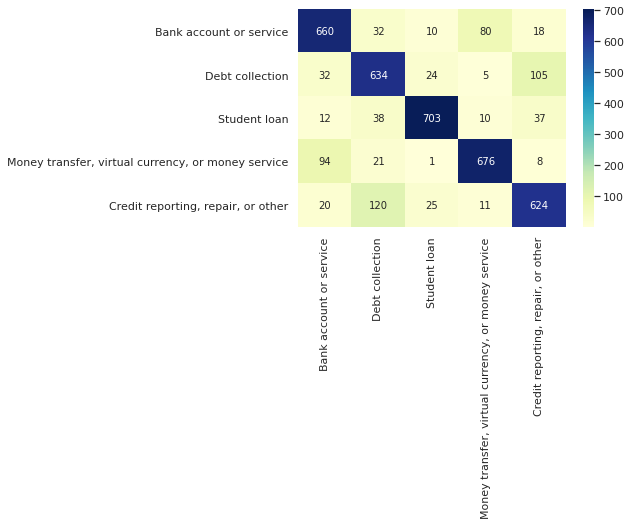

In [36]:
sns.heatmap(conf_matrix,
            cmap='YlGnBu',
            annot=True,
            fmt="d",
            xticklabels=y_test.unique(),
            yticklabels=y_test.unique())

In [37]:
recall_score(y_test, predictions, labels=y_test.unique(), average='macro')

0.8242499999999999

In [38]:
precision_score(y_test, predictions, labels=y_test.unique(), average='micro')

0.82425

### Model Evaluation on Test Dataset

- Note: Retrain the model using full training dataset.

## Homework

## Resources